1. Forest: an ensemble learner built on decision trees (p.421)
2. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=300,centers=4,random_state=0,cluster_std=1.0)

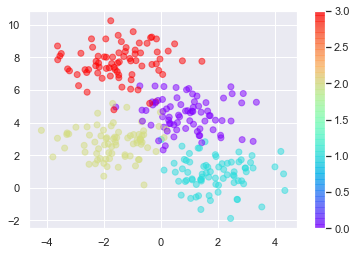

In [7]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow',alpha=0.5)
plt.colorbar()

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
model= DecisionTreeClassifier()
tree=model.fit(X,y)

In [10]:
model.classes_

array([0, 1, 2, 3])

In [77]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax=ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=10,cmap=cmap,clim=(y.min(),y.max()),zorder=1,alpha=1)
    
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    model.fit(X,y)
    
    xx,yy=np.meshgrid(np.linspace(*xlim,num=200),
                      np.linspace(*ylim,num=200))
    
    #ax.scatter(xx,yy,c='gray',s=10, marker='.', alpha=0.2,zorder=2)
    
    Z=model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    
    n_classes=len(np.unique(y)) # 4 classes here
    
    # draw contour lines and filled contours
    # Z: The height values over which the contour is drawn. 
    # levels: Determines the number and positions of the contour lines / regions.
    contours=ax.contourf(xx, yy, Z,
                         alpha=0.3,
                         levels=np.arange(n_classes+1)-0.5, #array([-0.5,  0.5,  1.5,  2.5,  3.5])
                         cmap=cmap, 
                         #clim=(y.min(),y.max()),
                         zorder=3)
    ax.set(xlim=xlim,ylim=ylim)

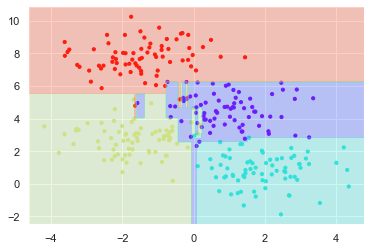

In [78]:
visualize_classifier(DecisionTreeClassifier(),X,y)

In [61]:
print(tree.decision_path(np.array([[1,1]])))

  (0, 0)	1
  (0, 1)	1
  (0, 15)	1
  (0, 16)	1
  (0, 20)	1


In [84]:
print(model.predict([[1,1],[2,4],[2,8],[-2,2]]))

[1 0 3 2]


1. It is very easy to go too deep (overfitting) in one tree. (p.425)
2. When we predict, using both trees might come up with a better result.

### Random Forests

##### bagging
1. random select (grab bag) decision trees 
2. average the results to reduce the overfitting
3. -> random forest

In [85]:
from sklearn.ensemble import BaggingClassifier

In [86]:
new_tree=DecisionTreeClassifier()
bag=BaggingClassifier(new_tree,n_estimators=100,max_samples=0.8,random_state=1)

In [87]:
bag.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


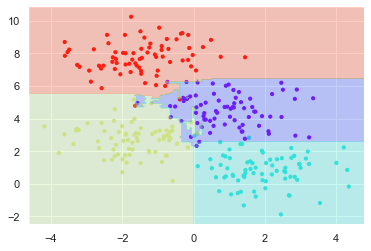

In [91]:
visualize_classifier(bag,X,y)

In [92]:
from sklearn.ensemble import RandomForestClassifier

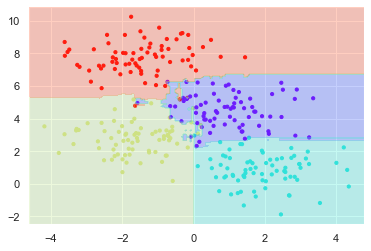

In [93]:
forest=RandomForestClassifier(n_estimators=100,random_state=0)
visualize_classifier(forest,X,y)